
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 600.  Construct portfolios from the 600 stocks in the S&P 600 small cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp600-galaxy']

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate=0, annual_returns='3 Yr')
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
0,AAP,"Advance Auto Parts, Inc.",US Stocks:Consumer Discretionary,-84.45,-76.77,-53.10,-45.60,-21.00,60.94,37.13,47.18,49.54,41.57,-45.60,49.54,-2259.02
1,AAT,American Assets Trust,US Stocks:Real Estate,-54.34,-59.17,-5.39,-15.34,-3.67,41.66,23.38,26.26,30.52,32.05,-15.34,30.52,-468.18
2,ABCB,Ameris Bancorp,US Stocks:Financials,72.99,-26.95,28.94,14.38,21.17,45.43,24.91,28.95,37.22,35.44,14.38,37.22,0.39
3,ABG,Asbury Automotive Group,US Stocks:Consumer Discretionary,-36.12,-68.46,5.75,12.02,28.47,47.85,20.02,39.75,36.69,40.72,12.02,36.69,0.33
4,ABM,"ABM Industries, Inc.",US Stocks:Industrials,20.17,-23.16,15.94,2.97,9.91,41.08,19.11,24.34,26.32,27.00,2.97,26.32,0.11
5,ABR,Arbor Realty Trust,US Stocks:Financials,-66.68,-52.27,-5.07,-3.81,23.04,55.58,32.51,21.44,41.71,36.12,-3.81,41.71,-158.92
6,ACA,"Arcosa, Inc.",US Stocks:Industrials,48.42,-52.39,10.87,17.26,16.56,48.59,20.24,31.21,30.26,28.33,17.26,30.26,0.57
7,ACAD,Acadia Pharmaceuticals,US Stocks:Healthcare,-72.83,-59.24,-10.77,-7.75,-21.69,46.46,29.84,36.01,45.60,49.12,-7.75,45.60,-353.40
8,ACIW,ACI Worldwide,US Stocks:Technology,-39.31,9.99,60.82,26.80,15.78,53.07,27.44,26.46,36.10,33.26,26.80,36.10,0.74
9,ACLS,"Axcelis Technologies, Inc.",US Stocks:Technology,36.54,-65.01,-49.48,-0.80,16.43,78.57,36.73,41.57,54.71,51.83,-0.80,54.71,-43.77


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
327,MDU,"MDU Resources Group, Inc.",US Stocks:Utilities,39.56,-3.60,29.92,22.37,16.47,29.30,18.04,28.91,23.84,23.61,22.37,23.84,0.94
84,BMI,"Badger Meter, Inc.",US Stocks:Technology,578.60,33.69,26.32,42.37,31.73,53.52,22.89,25.21,26.58,27.32,42.37,26.58,1.59
140,CTRE,"CareTrust REIT, Inc.",US Stocks:Real Estate,-0.42,40.94,20.61,27.07,18.46,27.61,19.15,22.44,21.27,25.86,27.07,21.27,1.27
259,HWKN,"Hawkins, Inc.",US Stocks:Materials,311.29,85.09,65.37,50.15,48.29,49.42,11.89,44.10,37.41,35.96,50.15,37.41,1.34
411,POWL,"Powell Industries, Inc.",US Stocks:Industrials,114.84,-57.61,35.86,116.69,53.78,63.87,28.05,61.76,66.72,59.74,116.69,66.72,1.75
12,ADMA,"ADMA Biologics, Inc.",US Stocks:Healthcare,509.95,349.84,260.74,128.17,51.67,84.87,37.89,57.38,52.00,51.52,128.17,52.00,2.46
485,SNEX,StoneX Group Inc.,US Stocks:Financials,611.48,161.08,91.76,45.26,40.44,49.57,24.19,25.60,29.60,30.40,45.26,29.60,1.53
47,AROC,"Archrock, Inc.",US Stocks:Energy,-69.44,-39.95,32.25,47.90,49.40,68.70,42.75,33.35,34.93,35.71,47.90,34.93,1.37
96,CALM,"Cal-Maine Foods, Inc.",US Stocks:Consumer Staples,51.31,-36.42,80.48,28.01,21.11,33.74,18.72,30.31,27.05,26.41,28.01,27.05,1.04
312,LRN,"Stride, Inc.",US Stocks:Consumer Discretionary,945.10,95.68,139.03,61.81,48.61,44.26,16.70,31.68,38.45,49.55,61.81,38.45,1.61


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,MDU,BMI,CTRE,HWKN,POWL,ADMA,SNEX,AROC,CALM,LRN,QNST,Ranked Portfolio
Annual Returns,22.37,42.37,27.07,50.15,116.69,128.17,45.26,47.90,28.01,61.81,26.04,49.39
Std Dev,23.84,26.58,21.27,37.41,66.72,52.00,29.60,34.93,27.05,38.45,40.24,28.80
Sharpe Ratio,0.94,1.59,1.27,1.34,1.75,2.46,1.53,1.37,1.04,1.61,0.65,1.72
Weight,0.11,0.08,0.10,0.16,0.07,0.05,0.08,0.05,0.10,0.12,0.08,1.00
Worst Typical Down Year,-25.31,-10.79,-15.47,-24.67,-16.75,24.17,-13.94,-21.96,-26.09,-15.09,-54.44,-8.21
Black Swan,-49.15,-37.37,-36.74,-62.08,-83.47,-27.83,-43.54,-56.89,-53.14,-53.54,-94.68,-37.00


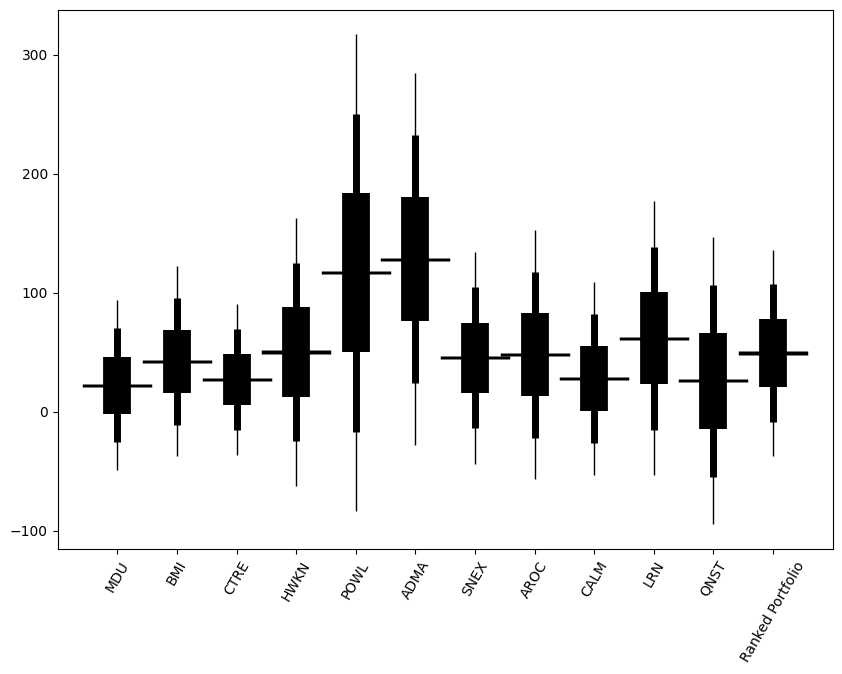

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

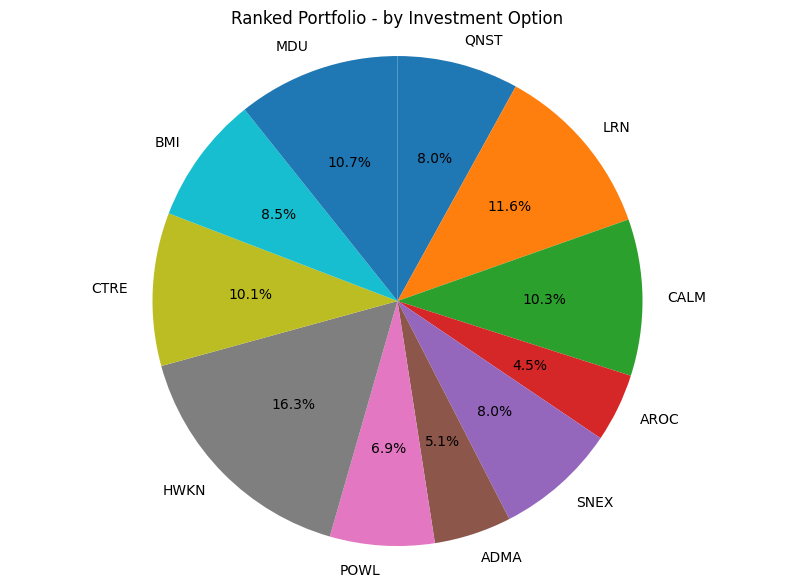

QNST   0.08
LRN    0.12
CALM   0.10
AROC   0.05
SNEX   0.08
ADMA   0.05
POWL   0.07
HWKN   0.16
CTRE   0.10
BMI    0.08
MDU    0.11



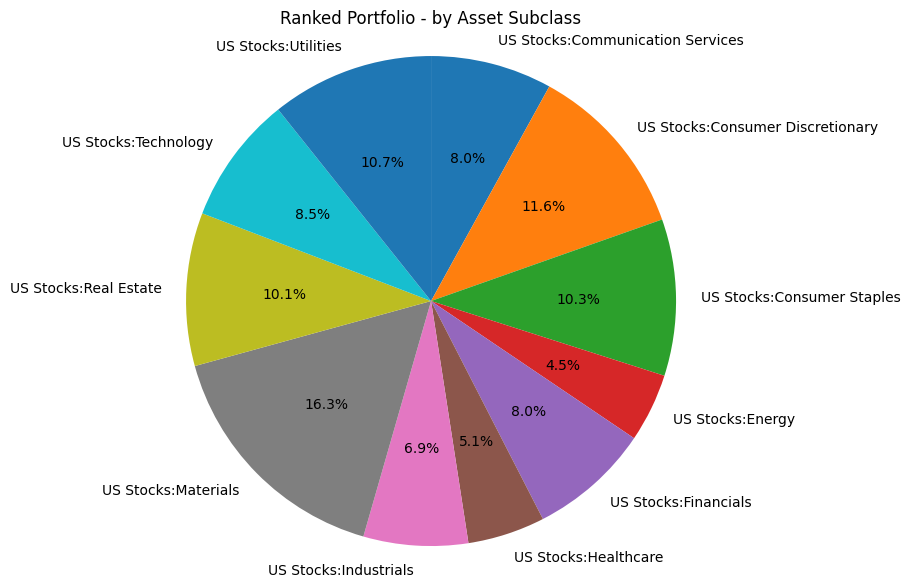

US Stocks:Communication Services   0.08
US Stocks:Consumer Discretionary   0.12
US Stocks:Consumer Staples         0.10
US Stocks:Energy                   0.05
US Stocks:Financials               0.08
US Stocks:Healthcare               0.05
US Stocks:Industrials              0.07
US Stocks:Materials                0.16
US Stocks:Real Estate              0.10
US Stocks:Technology               0.08
US Stocks:Utilities                0.11



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    MDU                            0.1072
    BMI                            0.0845
    CTRE                           0.1010
    HWKN                           0.1627
    POWL                           0.0690
    ADMA                           0.0511
    SNEX                           0.0800
    AROC                           0.0452
    CALM                           0.1033
    LRN                            0.1158
    QNST                           0.0802


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).